<a href="https://colab.research.google.com/github/karahokenstad/heat_flow_apparatus/blob/main/heat_flow_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [266]:
!pip install whit-phys-util

In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import whit_phys_util as buc
import scipy.constants as const

In [268]:
dim = 10 # dimension of array
iters = 20 # number of modeling iterations
model = np.zeros([iters,dim,dim]) 

In [269]:
#F0M = k*dt/(cp*rho*dx**2)    actual eqn, must be < 0.25
F0M = 0.2

# Boundary Conditions

In [270]:
model[:,:,:] = 20
model[:,:,0] = 50
model[:,:,9] = 0

# Solution

In [271]:
for x in range(0,iters-1):
  for i in range(dim):
    for j in range(dim):
      if i == 0:
        if j == 0:
          model[x+1,i,j] = (1-4*F0M)*model[x,i,j] + F0M*(model[x,i+1,j] + model[x,i,j+1] + model[x,i,j] + model[x,i,j])
        if j == (dim-1):
          model[x+1,i,j] = (1-4*F0M)*model[x,i,j] + F0M*(model[x,i+1,j] + model[x,i,j] + model[x,i,j] + model[x,i,j-1])
        else:
          model[x+1,i,j] = (1-4*F0M)*model[x,i,j] + F0M*(model[x,i+1,j] + model[x,i,j+1] + model[x,i,j] + model[x,i,j-1])
      elif i == (dim-1):
        if j == 0:
          model[x+1,i,j] = (1-4*F0M)*model[x,i,j] + F0M*(model[x,i,j] + model[x,i,j+1] + model[x,i-1,j] + model[x,i,j])
        if j == (dim-1):
          model[x+1,i,j] = (1-4*F0M)*model[x,i,j] + F0M*(model[x,i,j] + model[x,i,j] + model[x,i-1,j] + model[x,i,j-1])
        else:
          model[x+1,i,j] = (1-4*F0M)*model[x,i,j] + F0M*(model[x,i,j] + model[x,i,j+1] + model[x,i-1,j] + model[x,i,j-1])
      else:
        if j == 0:
          model[x+1,i,j] = (1-4*F0M)*model[x,i,j] + F0M*(model[x,i+1,j] + model[x,i,j+1] + model[x,i-1,j] + model[x,i,j])
        if j == (dim-1):
          model[x+1,i,j] = (1-4*F0M)*model[x,i,j] + F0M*(model[x,i+1,j] + model[x,i,j] + model[x,i-1,j] + model[x,i,j-1])
        else:
          model[x+1,i,j] = (1-4*F0M)*model[x,i,j] + F0M*(model[x,i+1,j] + model[x,i,j+1] + model[x,i-1,j] + model[x,i,j-1])

In [272]:
def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap='viridis')
    plt.colorbar()
    plt.show()

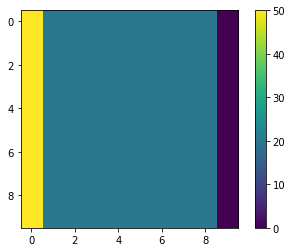

In [273]:
heatmap2d(model[0,:,:])

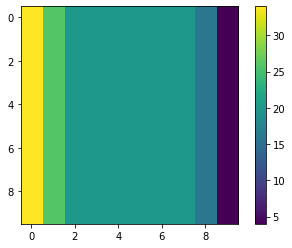

In [274]:
heatmap2d(model[1,:,:])

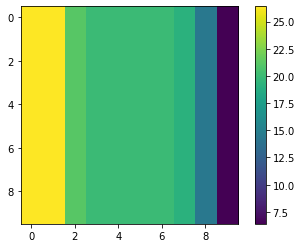

In [275]:
heatmap2d(model[2,:,:])

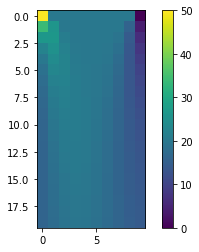

In [277]:
heatmap2d(model[:,5,:])